In [1]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout
from keras.models import Sequential, Model
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
def extract_data(file, train_data=True):
    df = pd.read_csv(file, index_col=False)
    if train_data:
        labels_train = df['label'].as_matrix()
        features_train = df.as_matrix()[:, 1:]
        return features_train, labels_train
    else:
        features_test = df.as_matrix()
        return features_test

In [3]:
features_train, labels_train = extract_data('train.csv')
features_final = extract_data('test.csv', train_data=False)

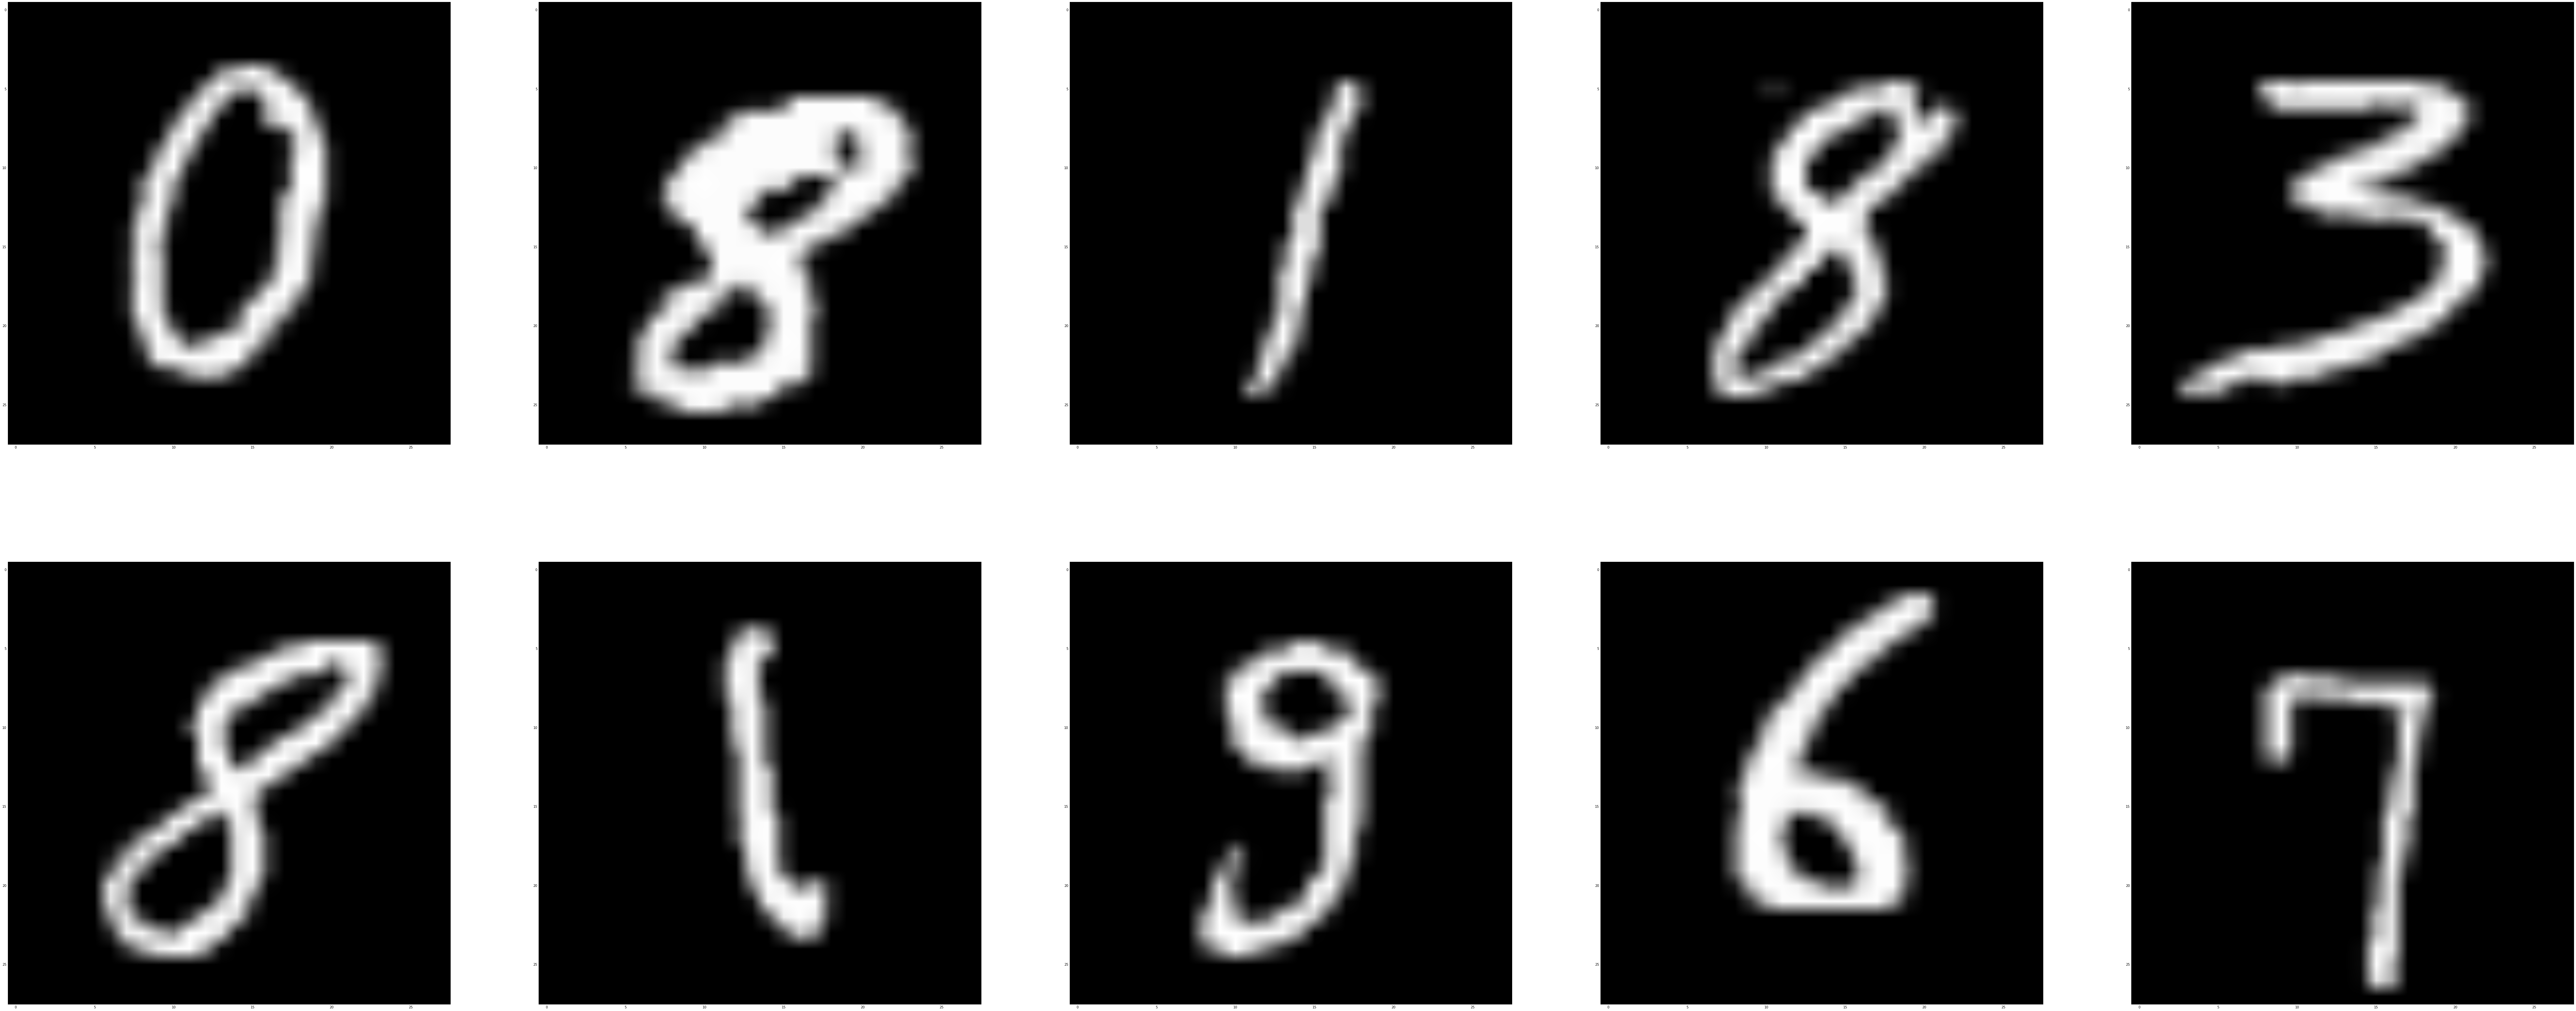

In [4]:
plt.figure(0, figsize=(140, 56))
# matplotlib assumes that images are RGB so use cmap='gray'
# to remove interpolation use interpolation=None
ctr = 1
col = 1
for i in range(5, 55, 5):
    plt.subplot(2, 5, ctr)
    plt.imshow(features_train[i, :].reshape(28,28), cmap='gray', interpolation=None)
    ctr += 1
plt.show()

In [5]:
model = Sequential()
act = 'relu'

model.add(Conv2D(128, 3, input_shape=(28, 28, 1)))
model.add(Activation(act))

model.add(Conv2D(64, 3))
model.add(Activation(act))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(16, 3))
model.add(Activation(act))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(8, 3))
model.add(Activation(act))

model.add(Flatten())

model.add(Dense(72))
model.add(Dropout(0.3))
model.add(Activation(act))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 128)       1280      
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        73792     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        9232      
_________________________________________________________________
activation_3 (Activation)    (None, 10, 10, 16)        0         
__________

In [6]:
features_train = features_train.reshape((-1, 28, 28, 1))
features_final = features_final.reshape((-1, 28, 28, 1))

print(labels_train.shape)

labels_train = np_utils.to_categorical(labels_train)

split = int(0.9 * features_train.shape[0])
x_train = features_train[:split]
x_test = features_train[split:]
y_train = labels_train[:split]
y_test = labels_train[split:]

print(features_train.shape, labels_train.shape)
print(features_final.shape)
print('-'*80)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(42000,)
(42000, 28, 28, 1) (42000, 10)
(28000, 28, 28, 1)
--------------------------------------------------------------------------------
(37800, 28, 28, 1) (37800, 10)
(4200, 28, 28, 1) (4200, 10)


In [7]:
hist = model.fit(features_train, labels_train,
         epochs=15,
         shuffle=True,
         batch_size = 100,
         validation_data=(x_test, y_test),
         verbose=2)

Train on 42000 samples, validate on 4200 samples
Epoch 1/15
65s - loss: 1.1557 - acc: 0.6521 - val_loss: 0.2222 - val_acc: 0.9369
Epoch 2/15
62s - loss: 0.2096 - acc: 0.9394 - val_loss: 0.1146 - val_acc: 0.9619
Epoch 3/15
62s - loss: 0.1355 - acc: 0.9606 - val_loss: 0.0708 - val_acc: 0.9764
Epoch 4/15
62s - loss: 0.1040 - acc: 0.9693 - val_loss: 0.0563 - val_acc: 0.9819
Epoch 5/15
69s - loss: 0.0864 - acc: 0.9750 - val_loss: 0.0373 - val_acc: 0.9874
Epoch 6/15
62s - loss: 0.0735 - acc: 0.9780 - val_loss: 0.0401 - val_acc: 0.9864
Epoch 7/15
62s - loss: 0.0687 - acc: 0.9791 - val_loss: 0.0347 - val_acc: 0.9869
Epoch 8/15
62s - loss: 0.0611 - acc: 0.9813 - val_loss: 0.0345 - val_acc: 0.9886
Epoch 9/15
62s - loss: 0.0545 - acc: 0.9835 - val_loss: 0.0232 - val_acc: 0.9931
Epoch 10/15
62s - loss: 0.0512 - acc: 0.9846 - val_loss: 0.0235 - val_acc: 0.9924
Epoch 11/15
62s - loss: 0.0471 - acc: 0.9862 - val_loss: 0.0163 - val_acc: 0.9960
Epoch 12/15
62s - loss: 0.0421 - acc: 0.9866 - val_loss: 0

In [8]:
import h5py as h5py

In [9]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [12]:
from keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [13]:
preds = loaded_model.predict(features_final, batch_size=100)

In [14]:
preds[0]

array([  3.56821350e-09,   1.41022784e-12,   9.99999762e-01,
         8.65101129e-08,   3.65571852e-12,   3.02197617e-15,
         1.18714471e-14,   7.19896676e-08,   2.80386581e-09,
         8.16904189e-14], dtype=float32)

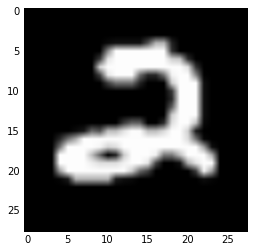

In [15]:
plt.imshow(features_final[0, :].reshape(28,28), cmap='gray', interpolation=None)
plt.show()

In [16]:
preds.shape

(28000, 10)

In [21]:
preds[0] > 0.5

array([ True, False, False, False, False, False, False, False, False, False], dtype=bool)

In [23]:
import numpy as np
np.unique(preds[0]>0.5, return_index=True)

(array([False,  True], dtype=bool), array([0, 2], dtype=int64))

In [82]:
def get_preds(prob_preds):
    preds = np.argmax(prob_preds, axis=1)
    return preds

In [83]:
preds_without_prob = get_preds(preds)
preds_without_prob[0]

2

In [84]:
result_dict = {
    "ImageId": [i for i in range(1, len(preds)+1)],
    "label": preds_without_prob
}
result_df = pd.DataFrame(result_dict, )
result_df.to_csv("result.csv", index=False)